<a href="https://colab.research.google.com/github/guptaShourya/HeartDisease/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
from google.colab import drive #drive
drive.mount('/content/drive') #attach google drive
from sklearn import model_selection #train, test split
from sklearn.preprocessing import StandardScaler #standardisation
from sklearn.model_selection import GridSearchCV #import GridSearchCV
from sklearn.linear_model import LogisticRegression #import Linear Regression
from sklearn.metrics import confusion_matrix #import confusion matrix
from sklearn.tree import DecisionTreeClassifier #import Decision Tree model
from sklearn.neighbors import KNeighborsClassifier #import KNN model
from sklearn.naive_bayes import GaussianNB #import Naive Bayes model
from sklearn.metrics import f1_score #import f1 score
from sklearn.ensemble import RandomForestClassifier #import Random forest model
#!pip install dataprep 
#!pip install datawig
import datawig # to impute missing values
sns.set()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/My Drive/ML sem-5/heart disease/data.csv'
# import data
data = pd.read_csv(path)

In [3]:
data.head(10) #display top 10 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# number of rows and columns in dataset
print("Data has {} rows, {} columns".format(data.shape[0], data.shape[1]))

Data has 303 rows, 14 columns


In [5]:
#number of nulls in dataset
print("Data has {} null values".format(data.isnull().any().sum()))

Data has 0 null values


In [6]:
# Statistical overview of data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# brief description of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.drop(['fbs', 'exang'], axis = 1, inplace = True) #drop the columns with more than 50% values as 0

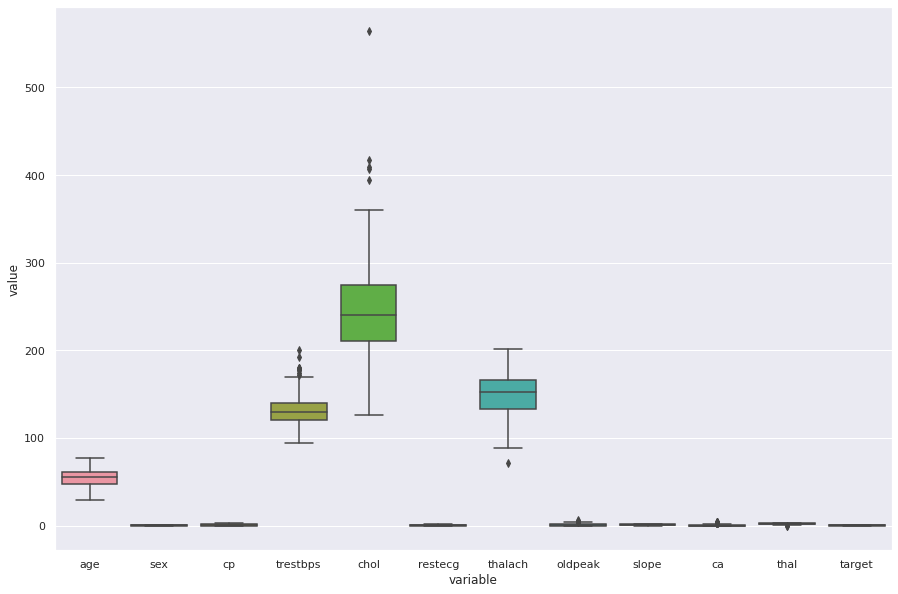

In [9]:
f, ax = plt.subplots(figsize = (15, 10)) # set size of the plot

sns.boxplot(x = "variable", y = "value", data = pd.melt(data), ax = ax) # use box plot to visualize outliers
plt.show() # display plot

In [10]:
def handleOutliers(data):
  Q1 = data.quantile(0.25) # calculate first quantile
  Q3 = data.quantile(0.75) # calculate third quantile
  IQR1 = Q3-Q1 # calculate inter quartile range

  data_c = data[~((data < (Q1-1.5*IQR1))|(data > (Q3+1.5*IQR1))).any(axis = 1)] # initialise data w/o outliers (drop outliers)

  print('Data loss is {}%'.format(((len(data) - len(data_c))/len(data))*100)) # report data loss
  return data_c.reset_index(drop = True)

In [11]:
data = handleOutliers(data) # drop outliers

2021-09-14 08:08:44,093 [INFO]  NumExpr defaulting to 2 threads.


Data loss is 13.861386138613863%


In [12]:
y = data['target'] #target variable
X = data.drop(['target'], axis = 1) #predictors

# split data into train (90%) and test(10%) set
Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(X, y, test_size = 0.1, random_state = 1)

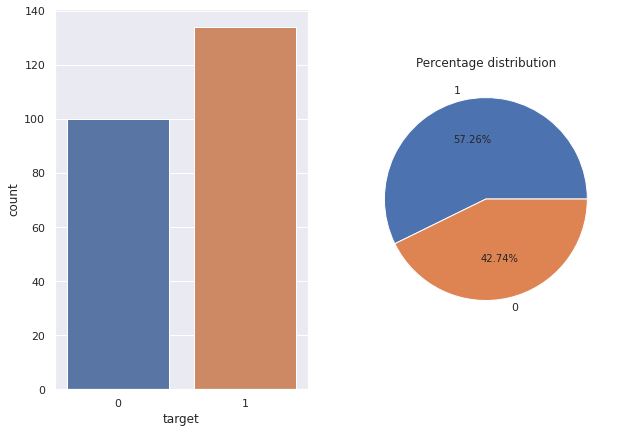

In [13]:
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 7)) # set up plot 

# visualise distribution in Ytrain

sns.countplot(x = Ytrain, ax = ax[0]) # plot bar plot

# plot a pie chart
ax[1].pie(x = Ytrain.value_counts().values, labels = Ytrain.value_counts().index, autopct = "%.2f%%")
ax[1].set_title("Percentage distribution") # set title

# display plots
plt.show()

In [14]:
scaler = StandardScaler() #scaler processor

Xtrain = scaler.fit_transform(Xtrain) #Standardize features by removing the mean and scaling to unit variance
Xtest = scaler.transform(Xtest) #apply standardisation to test data

In [15]:
def getF1Score(clf, Ytest, Xtest):
  return f1_score(Ytest, clf.predict(Xtest))

In [16]:
params = {'C' : [0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5]} # values of C parameter in LR to try for

clf_lr = GridSearchCV(LogisticRegression(), params, scoring = 'f1') # Logistic Regression

clf_lr.fit(Xtrain, Ytrain) # train LR model

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.005,
                               0.01, 0.03, 0.05, 0.1, 0.3, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

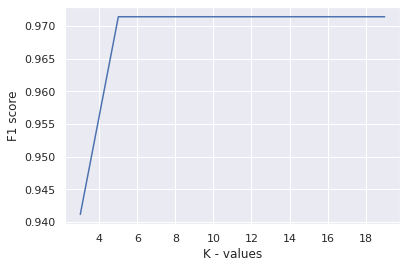

In [17]:
knn_au_y = [] # to store k values
knn_au_x = [] # to store AUPRC score corresponding to k values

# loop over every odd integer from 3 to 21 and use it as n_neighbors in Knn
for k in range(3, 21, 2): 
  clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean') #set up KNN model
  clf.fit(Xtrain, Ytrain) #fit model
  knn_au_y.append(getF1Score(clf, Ytest, Xtest)) #append AUPRC score
  knn_au_x.append(k) #append K value

sns.lineplot(x = knn_au_x, y = knn_au_y) #scatterplot

plt.ylabel("F1 score") # label y-axis 'AUPRC score'
plt.xlabel("K - values") # label x-axis 'Algorithms'

plt.show() # display plot

In [18]:
clf_knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean') # using K = 9
clf_knn.fit(Xtrain, Ytrain) #fit model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [19]:
clf_dt = DecisionTreeClassifier() # Decision Tree Classifier
clf_dt.fit(Xtrain, Ytrain) # train DT clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
params_rf = {'n_estimators' : np.arange(100, 1000, 100)}

clf_rf = GridSearchCV(RandomForestClassifier(), params_rf, scoring = 'f1') # Random Forest Classifier
clf_rf.fit(Xtrain, Ytrain) # train RF clf

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [21]:
params_nb = {'var_smoothing' : np.logspace(0,-9, num=100)} # values to try for var_smoothing

clf_nb = GridSearchCV(GaussianNB(), params_nb, scoring  = 'f1') # naive bayes algo
clf_nb.fit(Xtrain, Ytrain) # train NB 

GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02,...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

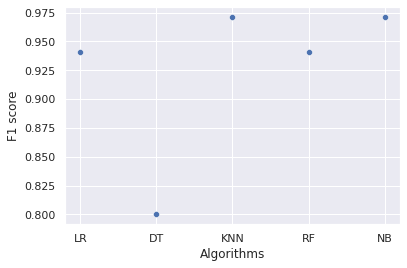

In [22]:
plotX = ["LR", "DT", "KNN", "RF", "NB"] # datapoints for x-axis of plot 
plotY = [getF1Score(clf_lr, Ytest, Xtest), getF1Score(clf_dt, Ytest, Xtest), getF1Score(clf_knn, Ytest, Xtest), getF1Score(clf_rf, Ytest, Xtest), getF1Score(clf_nb, Ytest, Xtest)] # datapoints for y-axis of plot

sns.scatterplot(x = plotX, y = plotY) #scatterplot

plt.ylabel("F1 score") # label y-axis 'F1 score'
plt.xlabel("Algorithms") # label x-axis 'Algorithms'

plt.show() # display plot

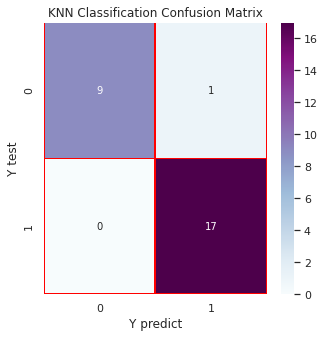

In [23]:
f, ax = plt.subplots(figsize=(5,5)) #set up plot

logreg_cm = confusion_matrix(Ytest, clf_knn.predict(Xtest)) # calculate confusion matrix
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu") #plot a heatmap using seaborn

plt.title('KNN Classification Confusion Matrix') # set title to plot
#set labels to plot
plt.xlabel('Y predict')
plt.ylabel('Y test')

plt.show() #display plot

In [24]:
print("Accuracy obtained using KNN classifier is : {}%".format(100*clf_knn.score(Xtest, Ytest)))

Accuracy obtained using KNN classifier is : 96.29629629629629%
